In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from main import Sequential, Dense, accuracy, SGD, Momentum, Adam, L2Regularizer, Dropout
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mnist_data.csv")

In [3]:
X = data.drop(columns=['label'])
y = data['label']
y = pd.get_dummies(y)
X  = X/255.0
X = X.to_numpy()
y = y.to_numpy().astype(np.float32)

X, X_test, y, y_test = train_test_split(X, y, train_size=0.3)


In [19]:

model = Sequential([
    Dense(32),
    Dropout(0.8),
    Dense(16),
    Dropout(0.8),
    Dense(16),
    Dropout(0.8),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_cross_entropy', optimizer=Adam(model, learning_rate=0.01))

In [20]:
(train_loss, train_accuracy), (test_loss, test_accuracy) = model.fit(X, y, epochs=30, X_test=X_test, y_test=y_test)

Epoch: 1, time taken: 2.040499448776245, accuracy=0.5921372673434856, sparse_categorical_cross_entropy loss=1.148063160756797
Epoch: 2, time taken: 2.01153302192688, accuracy=0.7009570642978002, sparse_categorical_cross_entropy loss=0.8503092807601815
Epoch: 3, time taken: 2.126363515853882, accuracy=0.7364900592216581, sparse_categorical_cross_entropy loss=0.7751166167516513
Epoch: 4, time taken: 2.033541440963745, accuracy=0.7635363790186125, sparse_categorical_cross_entropy loss=0.7540682783395071
Epoch: 5, time taken: 2.046919584274292, accuracy=0.774746192893401, sparse_categorical_cross_entropy loss=0.7284438670952821
Epoch: 6, time taken: 2.08537220954895, accuracy=0.7847134094754653, sparse_categorical_cross_entropy loss=0.7035532773410478
Epoch: 7, time taken: 1.9574480056762695, accuracy=0.7924862521150592, sparse_categorical_cross_entropy loss=0.6951729266169898
Epoch: 8, time taken: 2.046048402786255, accuracy=0.7930150169204738, sparse_categorical_cross_entropy loss=0.6767

In [24]:
# A = model.pre
y_pred = model.predict(X_test)
y_pred.shape
y_pred
temp = np.zeros_like(y_pred)
temp[np.arange(y_pred.shape[0]),np.argmax(y_pred, axis=1)] = True
accuracy(temp, y_test)



np.float64(0.9041496598639456)

0.912891156462585
26


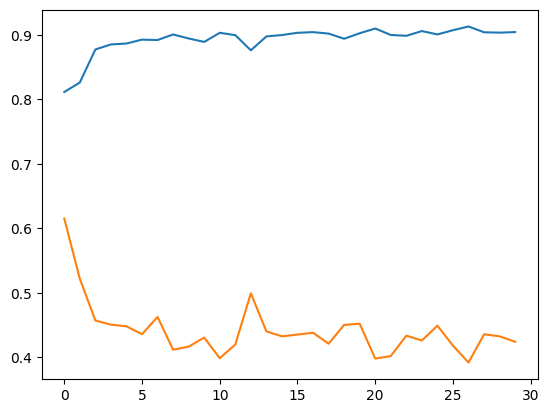

In [25]:
print(np.max(test_accuracy))
print(np.argmin(test_loss))
plt.plot(test_accuracy)
plt.plot(test_loss)

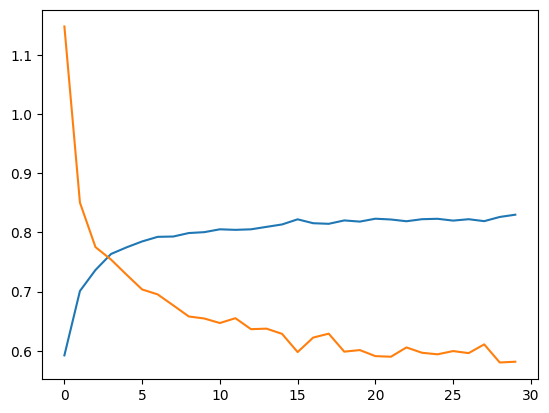

In [23]:
plt.plot(train_accuracy)
plt.plot(train_loss)

In [18]:
# import tensorflow as tf
X.shape

(12600, 784)

In [10]:
# tfmodel = tf.keras.Sequential([
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# tfmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy, metrics=['accuracy'])

In [11]:
# tfmodel.fit(X, y, epochs=10)